# Question 10.1
## (a) Regression tree model

In [1]:
# Load the data
data <- read.table("./data 10.1/uscrime.txt", header = TRUE)

In [2]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [3]:
# install.packages("tree")
# install.packages("randomForest")
library(tree)
library(randomForest)

Warning message:
"package 'tree' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [4]:
# Applying tree package
model <- tree(Crime ~., data = data)
summary(model)


Regression tree:
tree(formula = Crime ~ ., data = data)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

#### By the summary, we have 7 terminal nodes and 4 variables. 
#### Residual mean deviance is 47,390. 


In [5]:
# Check split data
model $ where

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 6 13  4 13  9 10 12 13  6  5 13  6  6  5  6 12  4 13 10 13  6  4 12  9  5 13 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 
 4 12 13  6  4 12  6  9 10  9  6  5  6 12  5  4  6 10  4 10  9

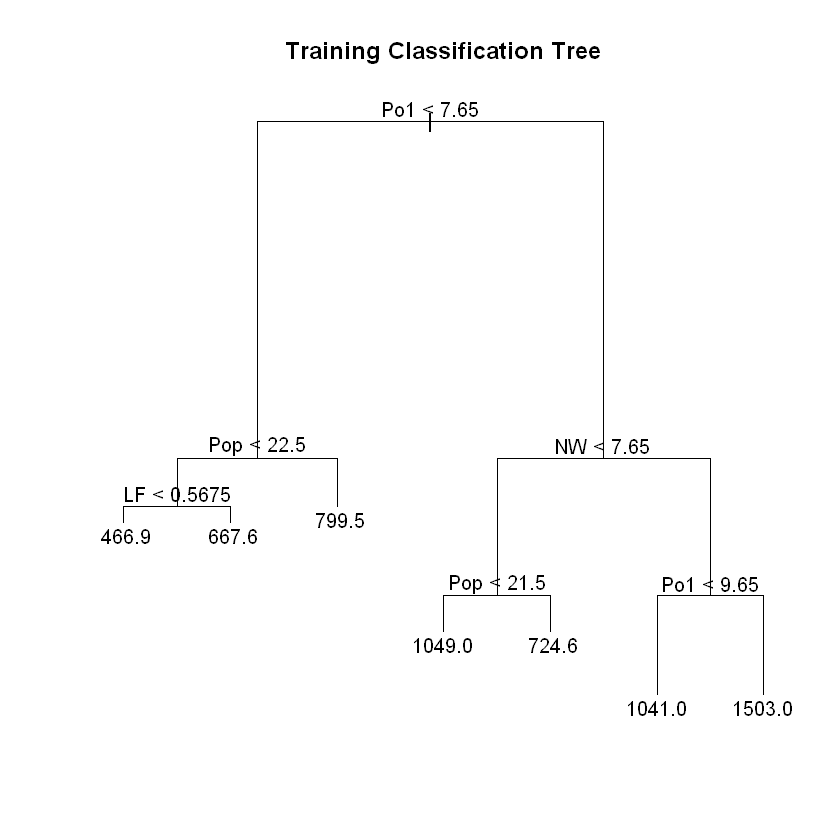

In [6]:
plot(model)
text(model)
title("Training Classification Tree")

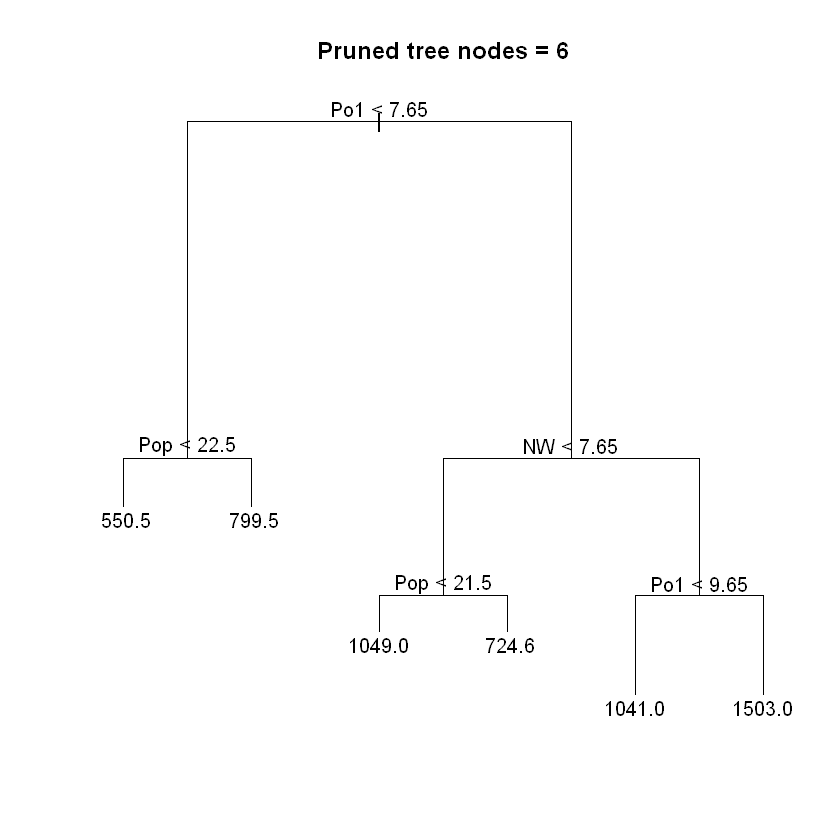

In [7]:
# Prune the tree for final tree
term_nodel = 6
prune_model <- prune.tree(model, best = term_nodel)
plot(prune_model)
text(prune_model)
title("Pruned tree nodes = 6")

In [8]:
summary(prune_model)


Regression tree:
snip.tree(tree = model, nodes = 4L)
Variables actually used in tree construction:
[1] "Po1" "Pop" "NW" 
Number of terminal nodes:  6 
Residual mean deviance:  49100 = 2013000 / 41 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -99.520   -1.545    0.000  122.800  490.100 

#### We can see after changing the number of terminal nodes to 6 the Residual mean deviance increase to 49100.

In [9]:
# Look at the deviation and do cross validation
set.seed(123)
cv <- cv.tree(model)
cv$dev

[1] 5578508 5617532 5626748 5818110 6771452 7902318 7747612

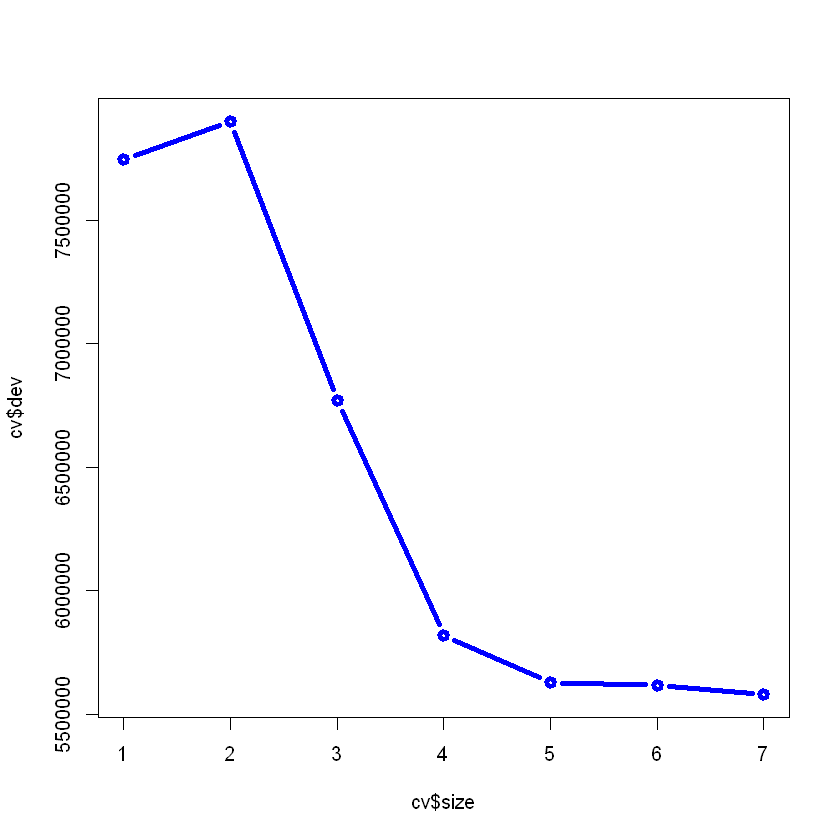

In [10]:
plot(cv$size, cv$dev, type="b", lwd=4, col="blue")

#### Deviance is minimum when the number of terminal nodes is 7. We can prune the tree with 7 leaf

In [11]:
term_node = 7
prune_model2 <- prune.tree(model, best = term_node)

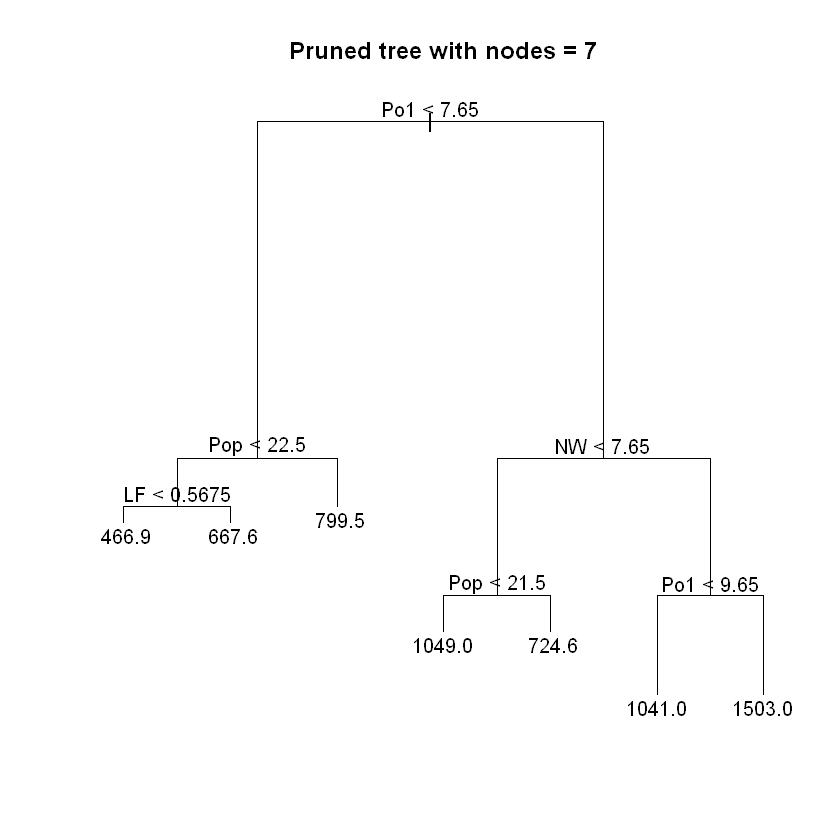

In [12]:
plot(prune_model2)
text(prune_model2)
title("Pruned tree with nodes = 7")

In [13]:
summary(prune_model2)


Regression tree:
tree(formula = Crime ~ ., data = data)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

## (b) Random forest model

In [14]:
# Calculate quality of fit for this model
crimeTreePredict <- predict(prune_model2, data = data[,1:15])
RSS <- sum((crimeTreePredict - data[,16])^2)
TSS <- sum((data[,16] - mean(data[,16]))^2)
R2 <- 1 - RSS/TSS
R2

[1] 0.7244962

#### R2 is pretty high at 0.72. Though, overfitting may be a problem.

In [15]:
# Create baseline randomForest Model
crime.rf <- randomForest(Crime ~ ., data=data, importance = TRUE, nodesize = 5)
crime.rf.predict <- predict(crime.rf, data=data[,-16])
RSS <- sum((crime.rf.predict - data[,16])^2)
R2 <- 1 - RSS/TSS
R2

[1] 0.4066584

In [16]:
# We get an R2 that's even worse than the previous tree. Perhaps I'll try using different values for mtry...
crime.rf2 <- randomForest(Crime ~ ., data=data, importance = TRUE, nodesize = 5, mtry = 10)
crime.rf.predict2 <- predict(crime.rf2, data=data[,-16])
RSS <- sum((crime.rf.predict2 - data[,16])^2)
R2 <- 1 - RSS/TSS
R2

[1] 0.38833

In [17]:
# Let's make a loop to plug in different values of mtry and nodesize to try and find the model with the best R2
result.rf <- data.frame(matrix(nrow=5, ncol=3))
colnames(result.rf) <- c("NodeSize", "mtry", "R2")
i = 1
suppressWarnings(for (nodesize in 2:15) {
  for (m in 1:20) {
    model <- randomForest(Crime ~ ., data=data, importance = TRUE, nodesize = nodesize, mtry = m)
    predict <- predict(model, data=data[,-16])
    RSS <- sum((predict - data[,16])^2)
    TSS <- sum((data[,16] - mean(data[,16]))^2)
    R2 <- 1 - RSS/TSS
    result.rf[i,1] <- nodesize
    result.rf[i,2] <- m
    result.rf[i,3] <- R2
    i = i + 1
  }
})
head(result.rf)

NodeSize,mtry,R2
2,1,0.3889864
2,2,0.4511758
2,3,0.4272085
2,4,0.4315946
2,5,0.4240540
2,6,0.4360488


In [18]:
result.rf[which.max(result.rf[,3]),]

,NodeSize,mtry,R2
2,2,2,0.4511758


#### As the result, a nodesize of 2 and an mtry value of 2 gives us the best randomForest model.

In [19]:

crime.rf.final <- randomForest(Crime ~ ., data=data, importance = TRUE, nodesize = 2, mtry = 2)
# The importance of the variables for our final model
importance(crime.rf.final)

,%IncMSE,IncNodePurity
M,3.7508601,243088.08
So,2.4702553,51254.85
Ed,4.5943538,364408.56
Po1,10.0388128,789722.78
Po2,7.8794935,822737.27
LF,3.0015225,470481.84
M.F,1.1328141,307946.80
Pop,2.2353183,400221.54
NW,9.4633391,557617.31
U1,0.7911874,243584.30


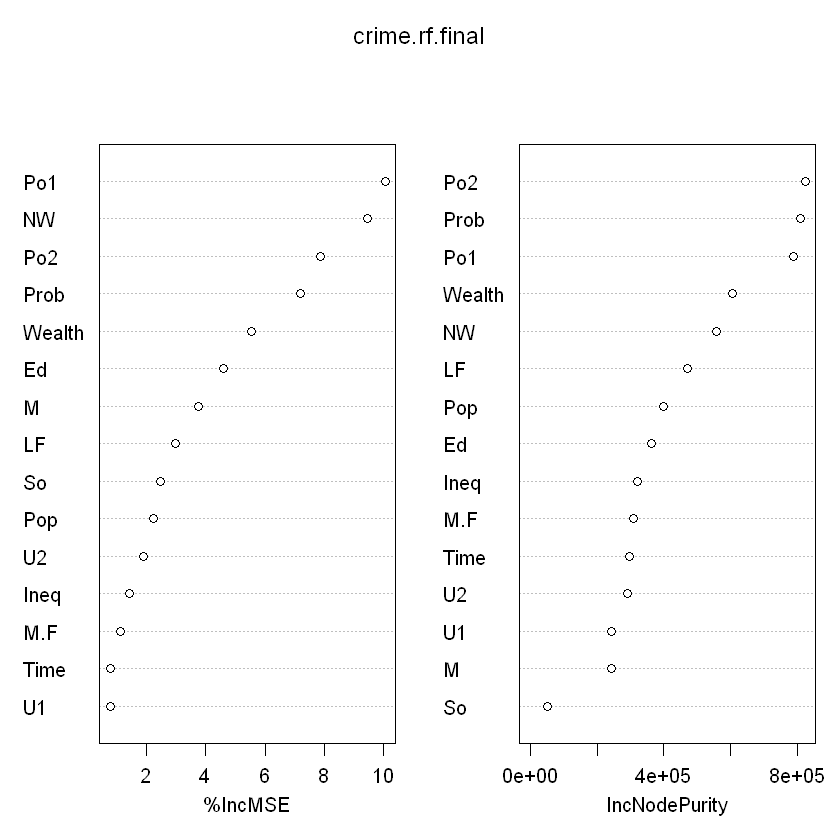

In [20]:
varImpPlot(crime.rf.final)

#### So it looks like the maximum R2 based on the above parameters is 0.45 at a nodesize of 4 and an mtry value (number of variables sampled for each split) of 3. We also saw in the final rf model that Po1, NW, and Po2 were the most important as measured by “%IncMSE” My takeaway for using randomForest is that it 1. is less accurate than a standard tree when looking at this data 2. it seems like increasing the number of variables used in the randomForest random sampling for each split actually decreases the accuracy of this model. This must have to do with overfitting, since this dataset is so small.

# Question 10.2

#### I am a data analyst working to reduce chronic homelessness, employing a logistic regression model could be instrumental in identifying individuals at a higher risk of chronic homelessness. Here's a scenario along with potential predictors:
 effectively.

#### Situation

#### The city is implementing a program aimed at reducing chronic homelessness by providing targeted interventions and support services to individuals who are at the highest risk of long-term homelessness. As part of this initiative, I am tasked with developing a predictive model to identify individuals who are more likely to become chronically homeless.

#### Potential Predictors:

#### History of Homelessness: The number of times an individual has experienced homelessness in the past could be a strong predictor of chronic homelessness.
#### Income Stability: Variability in income or lack of stable employment might indicate a higher risk of chronic homelessness.
#### Mental Health Conditions: Individuals with untreated or poorly managed mental health issues may be more susceptible to chronic homelessness.
#### Substance Abuse: Substance abuse problems, including alcohol and drug addiction, could contribute to the risk of chronic homelessness.
#### Social Support: Lack of family support or a strong social network might increase the likelihood of individuals becoming chronically homeless.
#### By analyzing historical data on homelessness and collecting relevant information on potential predictors, I can build a logistic regression model to assess the probability of an individual becoming chronically homeless. This model can then be used to prioritize resources and interventions towards those individuals who are identified as being at the highest risk, thus helping to reduce chronic homelessness more effectively.

# Question 10.3

In [21]:
# install.packages("ellipsis")
# install.packages("caret")
# install.packages("ggplot2", dependencies = TRUE)

library(ellipsis)
# install.packages("lifecycle")
library(caret)

Warning message:
"package 'ellipsis' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice


ERROR: Error: package 'ggplot2' required by 'caret' could not be found


In [22]:
set.seed(123)
credit <- read.table("./data 10.3/germancredit.txt", header = FALSE)
head(credit)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [23]:
table(credit$V21)


  1   2 
700 300 

In [24]:
# Replace 1 and 2 with 0 and 1
credit$V21[credit$V21==1] <- 0
credit$V21[credit$V21==2] <- 1

In [25]:
indices <- sample(1:nrow(credit), size = 0.7 * nrow(credit), replace = FALSE)
head(indices)

[1] 415 463 179 526 195 938

In [26]:
data_train <- credit[indices,] 
data_test <- credit[-indices,]

table(data_train$V21)


  0   1 
496 204 

In [27]:
table(data_test$V21)


  0   1 
204  96 

In [28]:
creditLogModel <- glm(V21 ~ ., data = data_train, family=binomial(link="logit"))
# Look at importance of predictors
summary(creditLogModel)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3765  -0.6592  -0.3506   0.6199   2.7732  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.131e+00  1.371e+00  -0.826 0.409079    
V1A12       -2.300e-01  2.707e-01  -0.850 0.395436    
V1A13       -7.906e-01  4.579e-01  -1.727 0.084217 .  
V1A14       -1.607e+00  2.887e-01  -5.565 2.63e-08 ***
V2           3.316e-02  1.113e-02   2.979 0.002891 ** 
V3A31        3.886e-01  7.048e-01   0.551 0.581384    
V3A32       -6.438e-01  5.712e-01  -1.127 0.259669    
V3A33       -6.974e-01  6.299e-01  -1.107 0.268225    
V3A34       -1.499e+00  5.748e-01  -2.607 0.009130 ** 
V4A41       -1.871e+00  4.589e-01  -4.077 4.57e-05 ***
V4A410      -1.448e+00  9.904e-01  -1.462 0.143799    
V4A42       -8.020e-01  3.284e-01  -2.442 0.014589 *  
V4A43       -8.683e-01  3.108e-01  -2.794 0.005209 ** 
V4A44       -1.96

In [29]:
#Let's do a baseline prediction.
creditPredict <- predict(creditLogModel, newdata=data_test[,-21], type="response")
table(data_test$V21, round(creditPredict))

   
      0   1
  0 178  26
  1  47  49

#### It's given that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly identify a good customer as bad.
#### To increasing specificity, we need to select only significant variables and remove the non significant ones.

In [30]:
data_train$V1A14[data_train$V1=="A14"] <-1
data_train$V1A14[data_train$V1!="A14"] <-0
data_train$V3A34[data_train$V3=="A34"] <-1
data_train$V3A34[data_train$V3!="A34"] <-0
data_train$V4A41[data_train$V4=="A41"] <-1
data_train$V4A41[data_train$V4!="A41"] <-0
data_train$V4A43[data_train$V4=="A43"] <-1
data_train$V4A43[data_train$V4!="A43"] <-0
data_train$V6A64[data_train$V6=="A64"] <-1
data_train$V6A64[data_train$V6!="A64"] <-0
data_train$V6A65[data_train$V6=="A65"] <-1
data_train$V6A65[data_train$V6!="A65"] <-0

In [31]:
model_train2<-glm(V21~V1A14+V2+V3A34+V4A41+V4A43+V5+V6A64+V6A65+V8,data=data_train,family =binomial(link='logit'))
summary(model_train2)


Call:
glm(formula = V21 ~ V1A14 + V2 + V3A34 + V4A41 + V4A43 + V5 + 
    V6A64 + V6A65 + V8, family = binomial(link = "logit"), data = data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9583  -0.7818  -0.4346   0.9183   2.5810  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.703e+00  3.524e-01  -4.833 1.34e-06 ***
V1A14       -1.515e+00  2.303e-01  -6.576 4.84e-11 ***
V2           3.054e-02  9.718e-03   3.142 0.001676 ** 
V3A34       -9.402e-01  2.366e-01  -3.973 7.09e-05 ***
V4A41       -1.216e+00  3.770e-01  -3.226 0.001254 ** 
V4A43       -6.313e-01  2.222e-01  -2.842 0.004486 ** 
V5           9.209e-05  4.379e-05   2.103 0.035467 *  
V6A64       -1.168e+00  5.856e-01  -1.995 0.046076 *  
V6A65       -1.052e+00  3.017e-01  -3.486 0.000490 ***
V8           3.269e-01  9.441e-02   3.463 0.000535 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to

#### Create confusion matrix of predicted vs. observed values on test set

In [32]:
data_test$V1A14[data_test$V1=="A14"] <-1
data_test$V1A14[data_test$V1!="A14"] <-0
data_test$V3A34[data_test$V3=="A34"] <-1
data_test$V3A34[data_test$V3!="A34"] <-0
data_test$V4A41[data_test$V4=="A41"] <-1
data_test$V4A41[data_test$V4!="A41"] <-0
data_test$V4A43[data_test$V4=="A43"] <-1
data_test$V4A43[data_test$V4!="A43"] <-0
data_test$V6A64[data_test$V6=="A64"] <-1
data_test$V6A64[data_test$V6!="A64"] <-0
data_test$V6A65[data_test$V6=="A65"] <-1
data_test$V6A65[data_test$V6!="A65"] <-0
predict2 <-predict(model_train2,newdata=data_test[,-21],type="response")
t2 <-as.matrix(table(round(predict2), data_test$V21))
names(dimnames(t2)) <-c("Predicted","Observed")
t2

         Observed
Predicted   0   1
        0 183  55
        1  21  41

In [33]:
specificity1 <- t2[1,1]/(t2[1,1]+t2[2,1])
specificity1

[1] 0.8970588

#### There are 21 False positives ,which need to be reduced further. And specificity is 89.7% which need tobe increased. Need to test with different values of threshold. Trying with threshold of 0.7

In [34]:
threshold <-0.7
t3 <-as.matrix(table(round(predict2>threshold), data_test$V21))
names(dimnames(t3)) <-c("Predicted","Observed")
t3

         Observed
Predicted   0   1
        0 200  83
        1   4  13

In [35]:
specificity <- t3[1,1]/(t3[1,1]+t3[2,1])
specificity

[1] 0.9803922

In [36]:
library(pROC)


Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [37]:
roc <-roc(data_test$V21,round(predict2))
roc

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = data_test$V21, predictor = round(predict2))

Data: round(predict2) in 204 controls (data_test$V21 0) < 96 cases (data_test$V21 1).
Area under the curve: 0.6621

In [38]:
accuracy <- (t3[1,1]+t3[2,2])/(t3[1,1]+t3[1,2]+t3[2,1]+t3[2,2])
accuracy

[1] 0.71

#### As there are 1000 observations, the data is split into training data and test data in the ration of 70:30.The logistic regression model is trained using training datawith all predictors. Each column consists ofmany variables . The significance of each variable in each column is analysed and the insignificantcomponents are removed. Using the significant variables, the data is trained . Confusion matrix iscreated on test values . In the confusion matrix , we got 21 false positives, which is 5 times more worsethan False negatives. So we need to bring down the false positives and increase the specificity.For increasing the specificity a threshold of 0.7 is set and prediction done . Thus we got specificity of 98% and accuracy of 71%. Tried for higher values of threshold where specificity is near to 1 ,which can thereason for overfitting